# Project by Bharath Ganesh
## used algos : adamic adar, common neighbors


In [3]:
%matplotlib inline
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
df=pd.read_csv("fblinkscsv.csv")

df

,user1,user2,\n
0,1,2,\N
1,1,3,\N
2,1,4,\N
3,1,5,\N
4,1,6,\N
...,...,...,...
1048543,27418,39410,1205180947
1048544,27418,18092,1216426606
1048545,27418,34654,1212982445
1048546,27418,10213,\N


# common neighbors implementation

In [8]:
val1=input("Enter the friend 1 you want to find the common friends ")
val2=input("Enter the friend 2 you want to find the common friends ")
newrows=set(df["user2"][df['user1'] == int(val1)])
newrows2=set(df["user2"][df['user1'] == int(val2)])
print(newrows)
print(newrows2)
print(len(newrows&newrows2))
a=0
for i in newrows:
    
    if(i==int(val2)):
       print("they are friends")
       a=0
       break
    else:
       a+=1

if(a!=0):
    print("they are not friends")

Enter the friend 1 you want to find the common friends 1
Enter the friend 2 you want to find the common friends 100
{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27}
{1539, 517, 520, 9, 523, 527, 15, 534, 539, 4142, 1588, 7734, 1591, 1080, 56, 1594, 86, 1622, 88, 5721, 607, 98, 99, 11386, 1209, 1213, 1749, 9942, 8925, 8947, 767, 16133, 16134, 4871, 7433, 8473, 795, 3379, 1846, 1876, 2390, 1878, 9561, 2393, 2395, 2396, 13670, 1405, 1919, 1408, 1927, 395, 7059, 1445, 425, 1450, 1451, 1453, 1968, 1973, 1469, 1471, 1984, 1992, 1993, 1994, 1995, 12236, 1998, 1487, 469, 471, 5079, 1499, 7156, 5109, 1524, 1527, 4602, 510, 511}
2
they are not friends


# adamic adar values

In [9]:
commonbois=newrows&newrows2
# print(commonbois)
sumboi=0

for i in commonbois:
    n=len(df["user1"][df["user1"]==i])
    if(n!=0):
        sumboi+=(1/math.log(n))
print(sumboi)    

0.378843834814202


# Graph visualisation


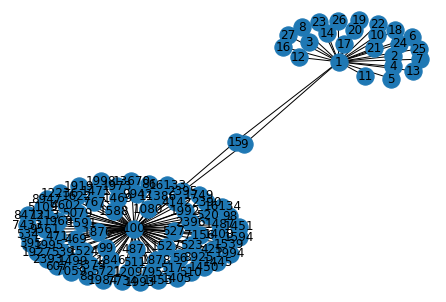

In [12]:

G=nx.Graph()
G.add_node(val1)
G.add_node(val2)


for i in newrows:  
    if(int(i)!=int(val2)):
       G.add_node(i)
       G.add_edge(val1,i)
    else:
        G.add_edge(val1,val2,color='red',weight=2)
for i in newrows2:
    if(int(i)!=int(val1)):
       G.add_node(i)
       G.add_edge(val2,i)
nx.draw(G, with_labels = True)

# for index, row in df.iterrows():
#     G.add_edge(row['user1'], row['user2'])
# nx.draw(G)    

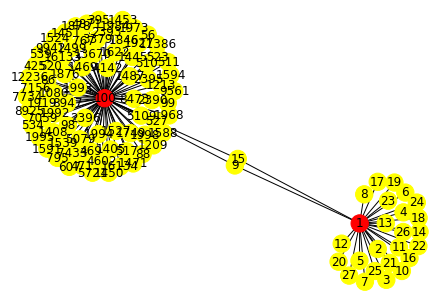

In [13]:
color_map = []
for node in G:
    if(node == val1)or(node == val2):
        color_map.append('red')
    else: color_map.append('yellow')      
nx.draw(G,node_color = color_map,with_labels = True)

In [14]:
aa = list(nx.adamic_adar_index(G))

In [15]:
aa

[(2, 3, 0.30692767643013485),
 (2, 4, 0.30692767643013485),
 (2, 5, 0.30692767643013485),
 (2, 6, 0.30692767643013485),
 (2, 7, 0.30692767643013485),
 (2, 8, 0.30692767643013485),
 (2, 9, 0.30692767643013485),
 (2, 10, 0.30692767643013485),
 (2, 11, 0.30692767643013485),
 (2, 12, 0.30692767643013485),
 (2, 13, 0.30692767643013485),
 (2, 14, 0.30692767643013485),
 (2, 15, 0.30692767643013485),
 (2, 16, 0.30692767643013485),
 (2, 17, 0.30692767643013485),
 (2, 18, 0.30692767643013485),
 (2, 19, 0.30692767643013485),
 (2, 20, 0.30692767643013485),
 (2, 21, 0.30692767643013485),
 (2, 22, 0.30692767643013485),
 (2, 23, 0.30692767643013485),
 (2, 24, 0.30692767643013485),
 (2, 25, 0.30692767643013485),
 (2, 26, 0.30692767643013485),
 (2, 27, 0.30692767643013485),
 (2, 534, 0),
 (2, 539, 0),
 (2, 16134, 0),
 (2, 7433, 0),
 (2, 8473, 0),
 (2, 795, 0),
 (2, 517, 0),
 (2, 4142, 0),
 (2, 3379, 0),
 (2, 1588, 0),
 (2, 7734, 0),
 (2, 1591, 0),
 (2, 1080, 0),
 (2, 520, 0),
 (2, 56, 0),
 (2, 1594, 0)

In [16]:
uu=list(nx.common_neighbors(G,val1,val2))

In [17]:
uu

[9, 15]

# Don't run anything below this

# computing common neighbors for all sets

In [12]:

# common =  lambda x,y : set(df["user2"][df['user1'] == x])&set(df["user2"][df['user1'] == y])
# a=list()
# for index, row in df.iterrows():
#     a.append(common(int(row["user1"]),int(row["user2"])))


# exporting data into seperate csv

In [46]:
# import csv
# with open("common.csv","w") as f:
#     rwriter = csv.writer(f)
#     rwriter.writerow(["user1","user2","common neighbors"])
#     for index,row in df.iterrows():
#         rwriter.writerow([row["user1"],row["user2"],a[index]])    


# reading the file to use it again

In [2]:
# kf=pd.read_csv("common.csv")

# converting the string data from csv file for further use(😁😁😁)

In [72]:
# a=[]
# listval=[]
# for i in kf["common neighbors"]:
#     if(i[0]=='{'):
#         listval=[]
#         v=i[1:-1].split(", ")
#         for j in v:
#             listval.append(int(j))
#         a.append(listval)
    
#     else :        
#         a.append(0)


In [58]:
# u=kf["common neighbors"][0]
# v=u[1:-1].split(", ")
# listval=[]
# for i in v:
#     listval.append(int(i))

# adamic adar calculations for all sets 

# P.S: Don't run this

In [95]:
# adamicadar=[]
# totalval=0
# for i in a:
#     totalval=0
#     if(i!=0):
#       for j in i:
#         n=len(df["user1"][df["user1"]==j])
#         if(n!=0):
#                totalval+=(1/math.log(n))
                
#     adamicadar.append(totalval)
            

# exporting data into csv

In [100]:
# import csv
# with open("adamiconly.csv","w") as f:
#     kwriter = csv.writer(f)
#     kwriter.writerow(["adamicadar","common neighbors"])
#     for index,row in df.iterrows():
#         kwriter.writerow([adamicadar[index],a[index]])   

In [72]:
tf=pd.read_csv("complete2.csv")

In [78]:
x=tf[["adamic adar","common length"]]
y=tf["friends"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [79]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [80]:
clf.fit(x_train,y_train)

LogisticRegression()

In [81]:
clf.predict(x_test)

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [82]:
clf.score(x_test,y_test)

0.5826045491392876

In [70]:
# import ast
# import csv
# with open("complete2.csv","w") as f:
#     rwriter = csv.writer(f)
#     rwriter.writerow(["user1","user2","adamic adar","common neighbors","common length","friends"])
#     for index,row in tf.iterrows():
#         if row["common neighbors"] == "0":
#             lengthval=0
#         else:
#             lengthval=len(ast.literal_eval(row["common neighbors"]))
#         friendval=0 if row["time"]=="\\N" else 1
#         rwriter.writerow([row["user1"],row["user2"],row["adamicadar"],row["common neighbors"],lengthval,friendval]) 